In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob
import time
from numba import jit, njit

#----- P_polytrop_mpi
@njit
def P_polytrop_single(rho, rho_0, rho_1, c_0, c_s):

    rho = rho*UnitDensity_in_cgs

    P_res = np.zeros_like(rho)

    for i in range(len(rho)):

        if rho[i] <= rho_0:
            P_res[i] = rho[i] * c_0*c_0

        elif rho[i] > rho_0:
            P_res[i] = rho[i] * ((c_0**2 - c_s**2)*(rho[i]/rho_0)**(-2./3.)+c_s**2) * (1. + (rho[i]/rho_1)**(4./3.))**0.5

    P_res = P_res / Unit_P_in_cgs

    return P_res

#unitTime_in_Myr =  0.6251515693750652 # Myr
M_sun = 1.989e33 # gram
grav_const_in_cgs = 6.67259e-8 #  cm3 g-1 s-2
Mcld = UnitMass_in_g = 10.0 * M_sun       # !!!!!!!!!!!!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!
R_0 = 0.22 # see the printed output of step_2_IC_Turner_1995.py
UnitRadius_in_cm = R_0 * 3.086e18  #!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!!
UnitDensity_in_cgs = UnitMass_in_g / UnitRadius_in_cm**3
Unit_u_in_cgs = grav_const_in_cgs * UnitMass_in_g / UnitRadius_in_cm
Unit_P_in_cgs = UnitDensity_in_cgs * Unit_u_in_cgs


rho_1 = 1.0e-14 # g/cm^3
c_s = 0.2 * 1.0e5 # cm/s - post shock sound speed.
c_0 = 0.2 * 1.0e5 * (Mcld/M_sun)**0.25

rho_0 = 2.9069579822172657e-20

In [28]:
filz = np.sort(glob.glob('/mnt/Linux_Shared_Folder_2022/Outputs_65k_M_10_b_0.2_Mach_10/*.pkl'))

In [29]:
#filz = np.sort(glob.glob('./Outputs_19k/Outputs/*.pkl'))

In [30]:
TA = time.time()

res = []

for j in range(0, len(filz), 5):

    #print('j = ', j)

    with open(filz[j], 'rb') as f:
        data = pickle.load(f)


    r = data['pos']
    h = data['h']

    #print('h = ', np.sort(h))

    x = r[:, 0]
    y = r[:, 1]
    z = r[:, 2]
    t = data['current_t']
    rho = data['rho']
    unitTime = data['unitTime']
    unitTime_in_Myr = unitTime / 3600. / 24. / 365.25 / 1.e6
    #print('rho = ', np.sort(rho)*UnitDensity_in_cgs)

    PP = P_polytrop_single(rho, rho_0, rho_1, c_0, c_s)
    
    #plt.hist(PP)

    #print('P = ', np.sort(PP))
    res.append([t, np.min(PP), np.max(PP), np.median(PP)])

res = np.array(res)
t = res[:, 0]
minP = res[:, 1]
maxP = res[:, 2]
medP = res[:, 3]

print('Elapsed time = ', time.time() - TA)

Elapsed time =  7.877972841262817


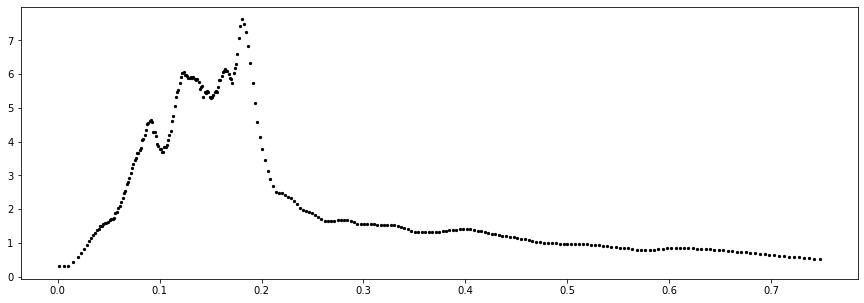

In [31]:
plt.figure(figsize = (15, 5))
plt.scatter(t, maxP, s = 5, color = 'k');

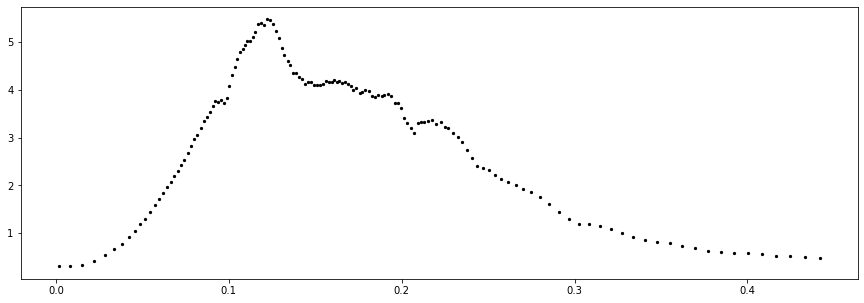

In [26]:
plt.figure(figsize = (15, 5))
plt.scatter(t, maxP, s = 5, color = 'k');